In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [21]:
df = pd.read_csv('Mumbai.csv',usecols=['Price','Area','Location','No. of Bedrooms','CarParking'])

In [22]:
df.head()

,Price,Area,Location,No. of Bedrooms,CarParking
0,4850000,720,Kharghar,1,1
1,4500000,600,Kharghar,1,1
2,6700000,650,Kharghar,1,1
3,4500000,650,Kharghar,1,1
4,5000000,665,Kharghar,1,1


Price,Area,Location,No.of.Bedrooms,CarParking


In [23]:
df.isnull().sum()

Price              0
Area               0
Location           0
No. of Bedrooms    0
CarParking         0
dtype: int64

In [24]:
len(df['Location'].value_counts())

413

In [25]:
df['No. of Bedrooms'].value_counts()

2    3206
1    2763
3    1472
4     224
5      44
6       8
7       2
Name: No. of Bedrooms, dtype: int64

In [26]:
location_stats = df.groupby('Location')['Location'].agg('count').sort_values(ascending = False)

In [27]:
location_stats

Location
Kharghar          681
Thane West        577
Mira Road East    481
Ulwe              391
Nala Sopara       225
                 ... 
Poddar Road         1
Phase 2             1
Peddar Road         1
Patel Nagar         1
15th Road           1
Name: Location, Length: 413, dtype: int64

In [28]:
location_stats_less_than_50 = location_stats[location_stats<=50]

In [29]:
location_stats_less_than_50

Location
Vasai            48
Seawoods         46
Borivali East    45
Badlapur East    43
Bhandup West     43
                 ..
Poddar Road       1
Phase 2           1
Peddar Road       1
Patel Nagar       1
15th Road         1
Name: Location, Length: 384, dtype: int64

In [30]:
df['Location'] = df['Location'].apply(lambda x:'other' if x in location_stats_less_than_50 else x)

In [31]:
df['Location'].value_counts()

other               2544
Kharghar             681
Thane West           577
Mira Road East       481
Ulwe                 391
Nala Sopara          225
Borivali West        202
Kalyan West          197
Andheri West         189
Panvel               180
Powai                178
Malad West           176
Chembur              174
Kandivali East       168
Virar                137
Kandivali West       127
Kamothe              120
Goregaon West        100
Andheri East          95
Malad East            92
Mulund West           79
Dahisar               78
Boisar                78
Taloja                75
Ville Parle East      74
Goregaon East         72
Naigaon East          61
Magathane             61
Dombivali             56
Thane                 51
Name: Location, dtype: int64

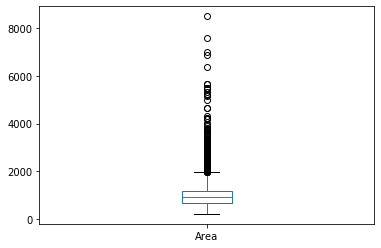

In [19]:
df['Area'].plot(kind='box')

In [32]:
df['CarParking'].value_counts()

9    6321
1    1303
0      95
Name: CarParking, dtype: int64

In [38]:
df['CarParking'] = df['CarParking'].apply(lambda x:random.choice([1,0]) if x==9 else x)

In [39]:
df['CarParking'].value_counts()

1    4496
0    3223
Name: CarParking, dtype: int64

In [40]:
dummies = pd.get_dummies(df['Location'])

In [42]:
df = pd.concat([df,dummies.drop('other',axis='columns')],axis=1)

In [43]:
df.head()

,Price,Area,Location,No. of Bedrooms,CarParking,Andheri East,Andheri West,Boisar,Borivali West,Chembur,...,Naigaon East,Nala Sopara,Panvel,Powai,Taloja,Thane,Thane West,Ulwe,Ville Parle East,Virar
0,4850000,720,Kharghar,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6700000,650,Kharghar,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4500000,650,Kharghar,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5000000,665,Kharghar,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.drop('Location',axis=1,inplace=True)

In [45]:
df.shape

(7719, 33)

In [94]:
df['Area'] = df['Area'].astype('float')

In [83]:
df['Price'] = df['Price']/100000

In [95]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

Linear Regression

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_test)
r2_score(y_test,y_pred)

0.11544499434322475

K-Fold cross validation

In [119]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
    
cv = ShuffleSplit(n_splits = 15,test_size = 0.25,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.11544499, 0.10304991, 0.11478864, 0.1129083 , 0.10566124,
       0.11098869, 0.10767544, 0.13399297, 0.1351586 , 0.14768132,
       0.14884228, 0.13602839, 0.10680253, 0.09450915, 0.13766245])

SVR

In [1]:
def predict_price(location,sqft,cp,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = cp
    
    if loc_index >=0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [104]:
predict_price('Kharghar',720,1,1)

52.43209260132724

In [106]:
predict_price('Andheri West',720,1,1)

212.7372323223309

In [107]:
import pickle

with open('mumbai_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [109]:
import json
columns = {
    'data_columns':[col.lower() for col in X.columns]
}
with open("mumbai_columns.json","w") as f:
    f.write(json.dumps(columns))